<a href="https://colab.research.google.com/github/jiyapatel4/CACoding/blob/master/EDA/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats

df = pd.read_csv("depression_cyp_dataset.csv")

In [53]:
print(df.head(20))
print(df.describe())

                ID          AGE          LOS          RAR            A  \
count  1500.000000  1500.000000  1500.000000  1500.000000  1500.000000   
mean    750.500000    38.783333   176.520667     0.094667     0.109333   
std     433.157015    15.376628   174.259930     0.292852     1.048545   
min       1.000000    18.000000     6.000000     0.000000     0.000000   
25%     375.750000    24.000000    90.000000     0.000000     0.000000   
50%     750.500000    37.000000   138.000000     0.000000     0.000000   
75%    1125.250000    51.000000   191.250000     0.000000     0.000000   
max    1500.000000    87.000000  2776.000000     1.000000    20.000000   

                 B            C            D            E            F  ...  \
count  1500.000000  1500.000000  1500.000000  1500.000000  1500.000000  ...   
mean      0.877333     0.092000     0.824667     0.351333     1.090667  ...   
std       3.072770     1.361165     3.847223     2.262589     3.004296  ...   
min       0.00000

In [ ]:
df.columns

Index(['ID', 'GENDER', 'AGE', 'RACE/ETHNICITY', 'Diagnosis', 'MD',
       'Assignment', 'EMR', 'LOS', 'RAR', 'A', 'B', 'C', 'D', 'E', 'F', 'G',
       'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U',
       'V', 'W', 'X', 'Y', 'Z', 'AA', 'AB', 'AC', 'AD',
       '# Psychotropic Medications', '# Administrations',
       'Therapeutic Guidances'],
      dtype='object')

Text(0.5, 1.0, '# of participants by gender')

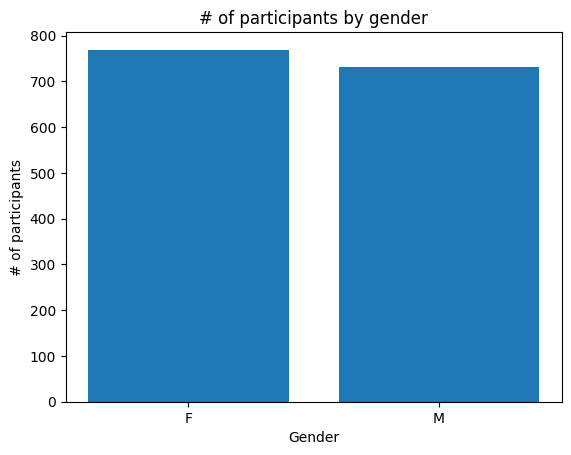

In [ ]:
import matplotlib.pyplot as plt

gender = df['GENDER'].unique()
nums = df['GENDER'].value_counts()
plt.bar(gender, nums)
plt.xlabel("Gender")
plt.ylabel("# of participants")
plt.title('# of participants by gender')


Text(0.5, 1.0, '# of participants by race/ethnicity')

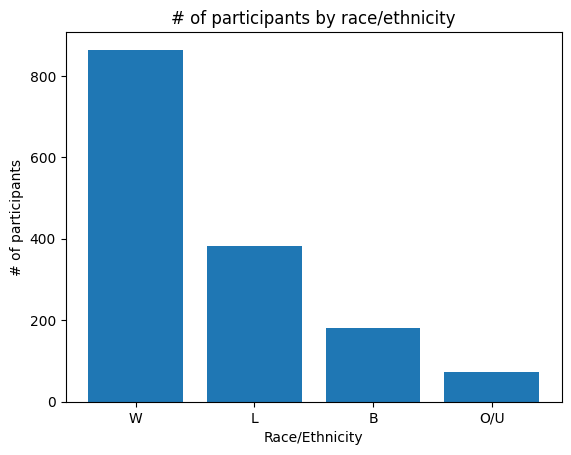

In [ ]:
race = df['RACE/ETHNICITY'].unique()
nums = df['RACE/ETHNICITY'].value_counts()
plt.bar(race, nums)
plt.xlabel("Race/Ethnicity")
plt.ylabel("# of participants")
plt.title('# of participants by race/ethnicity')

Text(0.5, 1.0, '# of participants by age')

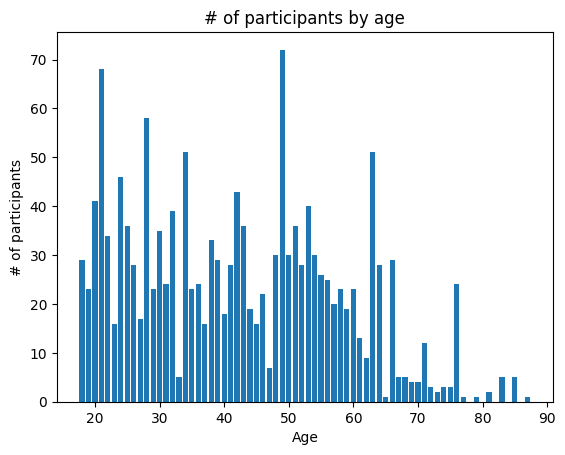

In [ ]:
ages = df['AGE'].unique()
nums = df['AGE'].value_counts()
plt.bar(ages, nums)
plt.xlabel("Age")
plt.ylabel("# of participants")
plt.title('# of participants by age')

Text(0.0, 1.0, 'Diagnosis by # of participants')

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


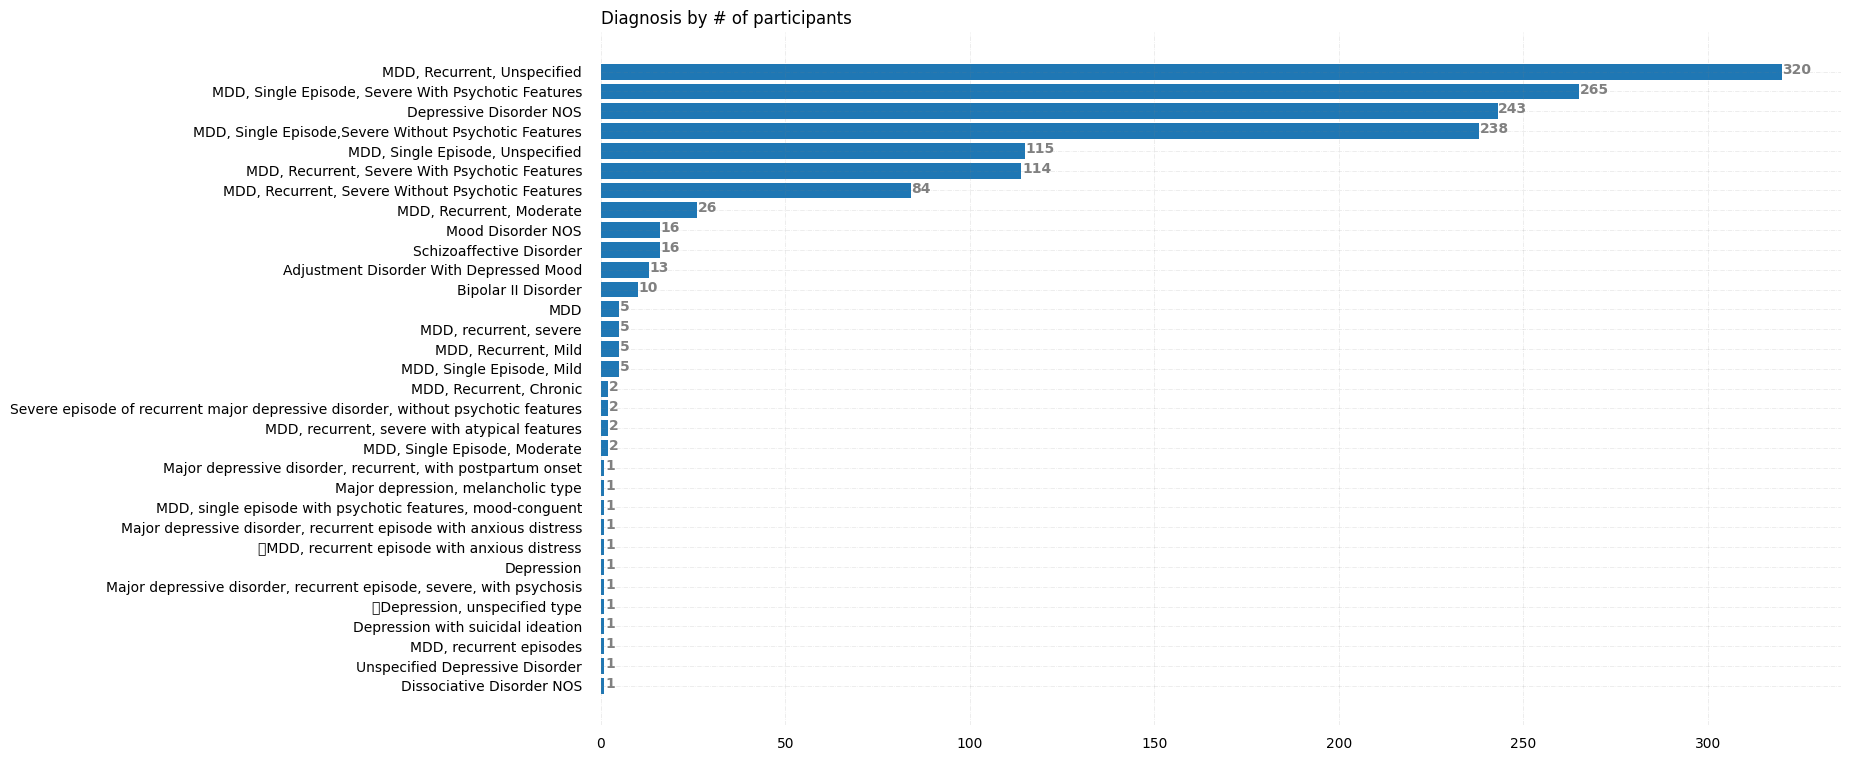

In [ ]:
diagnosis = df['Diagnosis'].unique()
nums = df['Diagnosis'].value_counts()

fig, ax = plt.subplots(figsize =(16, 9))
ax.barh(diagnosis, nums)
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
ax.grid(True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.2)

for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')


# Show top values
ax.invert_yaxis()
ax.set_title('Diagnosis by # of participants',
             loc ='left', )

Text(0.5, 1.0, 'Length of stay by # of participants')

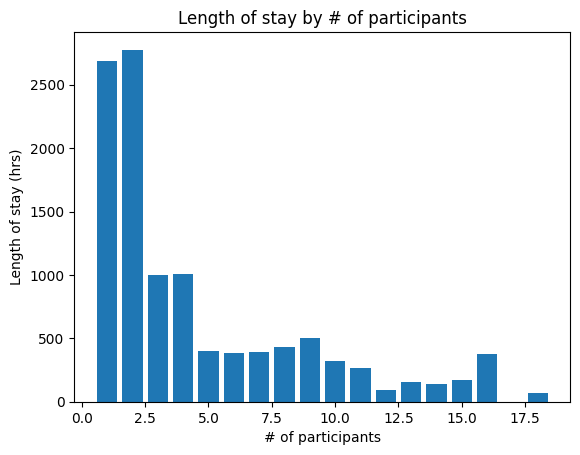

In [ ]:
# Length of stay
los = df['LOS'].unique() # collect all the unique LOS values into an array
nums = df['LOS'].value_counts() # number of participants categorized by LOS
plt.bar(nums, los)
plt.ylabel("Length of stay (hrs)")
plt.xlabel("# of participants")
plt.title("Length of stay by # of participants")

Text(0.5, 1.0, 'Readmisson rate vs length of stay')

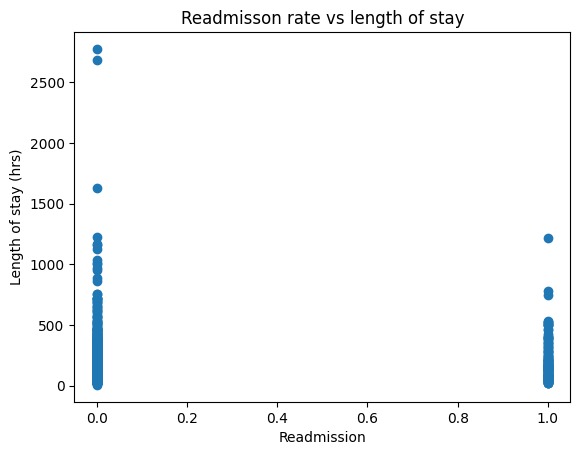

In [ ]:
# Readmisson rate vs length of stay
plt.scatter(df['RAR'],df['LOS'])
plt.xlabel("Readmission")
plt.ylabel("Length of stay (hrs)")
plt.title("Readmisson rate vs length of stay")

S #: 477
G #: 982


Text(0.5, 0.98, 'Group Assignment')

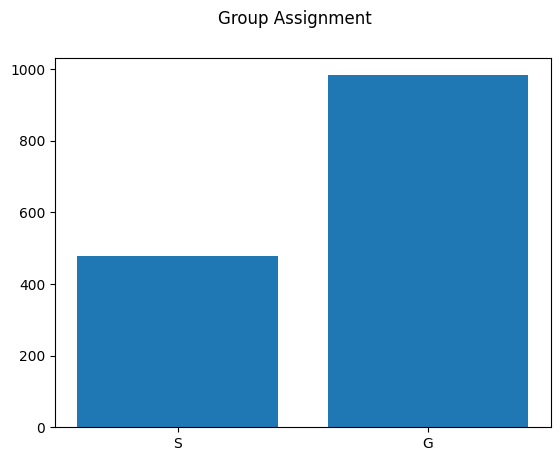

In [42]:
# Group S vs Group G
grp_S = (df['Assignment'] == 'S').sum() # standard therapy
grp_G = (df['Assignment'] == 'G').sum() # genomic-guided therapy

print("S #: " + str(grp_S))
print("G #: " + str(grp_G))
data = {'S': grp_S, 'G': grp_G}

names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots()
axs.bar(names, values)
fig.suptitle('Group Assignment')

Text(0, 0.5, 'Length of stay (days)')

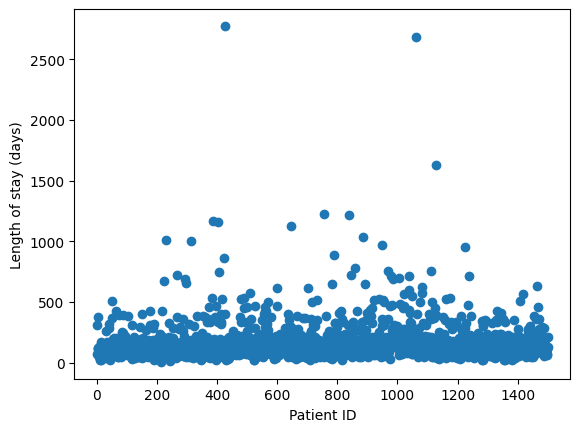

In [43]:
plt.scatter([float(y) for y in df["ID"]], [float(y) for y in df["LOS"]])
plt.xlabel("Patient ID")
plt.ylabel("Length of stay (days)")

Readmission #: 142
No readmission #: 1358


Text(0.5, 0.98, 'Readmission Rate')

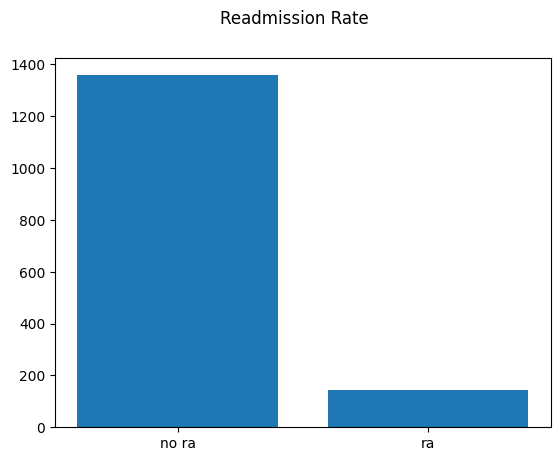

In [44]:
# Readmission rate
import matplotlib.pyplot as plt
num_rar = (df['RAR'] == 1).sum()
num_no_rar = (df['RAR'] == 0).sum()

print("Readmission #: " + str(num_rar))
print("No readmission #: " + str(num_no_rar))
data = {'no ra': num_no_rar, 'ra': num_rar}

names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots()
axs.bar(names, values)
fig.suptitle('Readmission Rate')

Readmission # for group G: 99 out of 982 | 10% 

Readmission # for group S: 43 out of 477 | 9% 



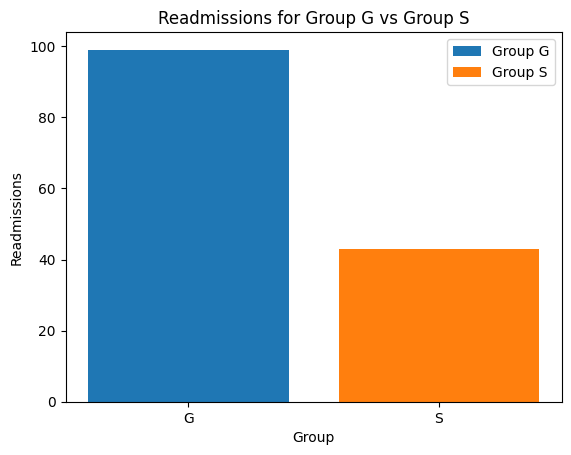

In [47]:
# *** RR vs Group S/G

# drop rows with no assignment
df1 = df.dropna(axis=0, how="any", subset="Assignment")

# filter to create group G dataframe
required_group_g = ['G']
df_g = df1.loc[df1['Assignment'].isin(required_group_g)]

# filter to create group S dataframe
required_group_s = ['S']
df_s = df1.loc[df1['Assignment'].isin(required_group_s)]

# count number of readmissions per group
readmissions_per_group_g = df_g.groupby('Assignment')['RAR'].sum()
readmissions_per_group_s = df_s.groupby('Assignment')['RAR'].sum()

plt.bar(readmissions_per_group_g.index, readmissions_per_group_g.values, label='Group G')
plt.bar(readmissions_per_group_s.index, readmissions_per_group_s.values, label='Group S')

plt.xlabel("Group")
plt.ylabel("Readmissions")
plt.legend()
plt.title("Readmissions for Group G vs Group S")


print(f"Readmission # for group G: {df_g['RAR'].sum()} out of {grp_G} | {round((df_g['RAR'].sum()/grp_G) * 100)}% \n")
print(f"Readmission # for group S: {df_s['RAR'].sum()} out of {grp_S} | {round((df_s['RAR'].sum()/grp_S) * 100)}% \n")

['EG' 'CT' 'TL']
Therapeutic Guidances
EG    1000
CT     393
TL      66
Name: count, dtype: int64


Text(0.5, 1.0, 'Therapeutic guidance for all participants')

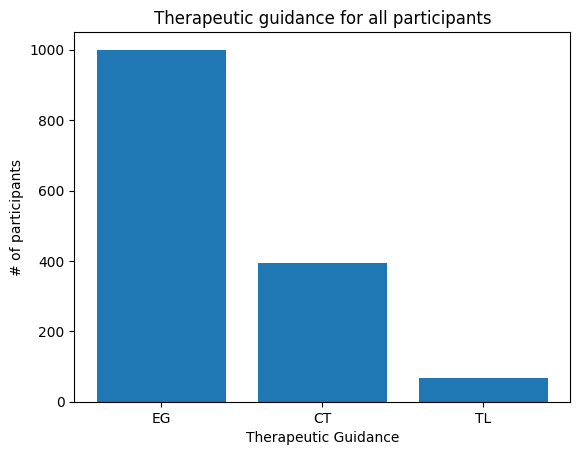

In [ ]:
#some rows have therapeutic guidance information missing so drop them
df1 = df.dropna(axis=0, how="any", subset="Therapeutic Guidances")

tg = df1['Therapeutic Guidances'].unique()
nums = df1['Therapeutic Guidances'].value_counts()
print(tg)
print(nums)

plt.bar(tg, nums)
plt.xlabel("Therapeutic Guidance")
plt.ylabel("# of participants")
plt.title("Therapeutic guidance for all participants")

['EG' 'CT' 'TL']
Therapeutic Guidances
EG    523
CT    393
TL     66
Name: count, dtype: int64


Text(0.5, 1.0, 'Therapeutic guidance for group G')

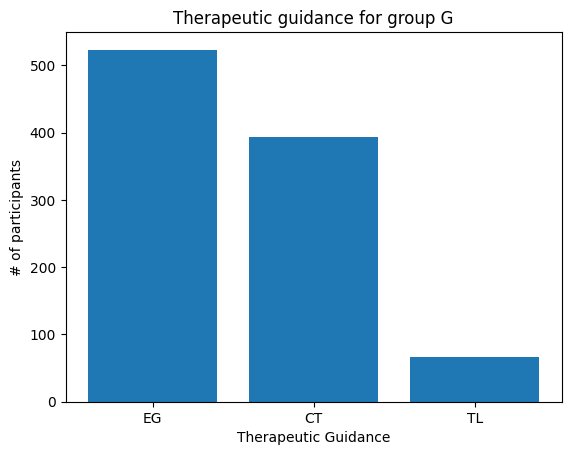

In [ ]:
#now do same thing but only people in G group
required_group = ['G']
df_g = df1.loc[df1['Assignment'].isin(required_group)]

tg = df_g['Therapeutic Guidances'].unique()
nums = df_g['Therapeutic Guidances'].value_counts()
print(tg)
print(nums)
plt.bar(tg, nums)
plt.xlabel("Therapeutic Guidance")
plt.ylabel("# of participants")
plt.title("Therapeutic guidance for group G")

Text(0.5, 1.0, 'Readmissions by TG for Group G compared to Group S')

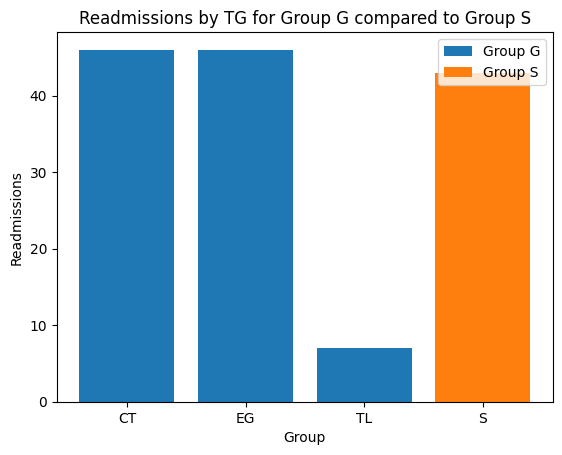

In [ ]:
#Readmission rate vs therapeutic guidance

required_group = ['S']
df_s = df1.loc[df1['Assignment'].isin(required_group)]

readmissions_per_group = df_g.groupby('Therapeutic Guidances')['RAR'].sum()
readmissions_per_group_s = df_s.groupby('Assignment')['RAR'].sum()

plt.bar(readmissions_per_group.index, readmissions_per_group.values, label='Group G')
plt.bar(readmissions_per_group_s.index, readmissions_per_group_s.values, label='Group S')

plt.xlabel("Group")
plt.ylabel("Readmissions")
plt.legend()
plt.title("Readmissions by TG for Group G compared to Group S")

Therapeutic Guidances
CT    11.704835
EG     8.795411
TL    10.606061
dtype: float64 Assignment
S    9.014675
dtype: float64


Text(0.5, 1.0, 'Readmission rates by TG for Group G compared to rate for Group S')

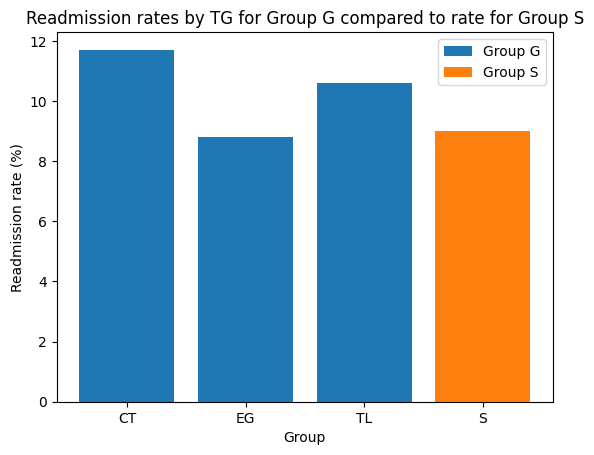

In [ ]:
total_patients_per_group = df_g.groupby('Therapeutic Guidances').size()
total_patients_s = df_s.groupby('Assignment').size()

readmission_rate = (df_g.groupby('Therapeutic Guidances')['RAR'].sum() / total_patients_per_group) * 100
readmission_rate_s = (df_s.groupby('Assignment')['RAR'].sum()/total_patients_s) * 100
print(readmission_rate, readmission_rate_s)

# Create a bar chart
plt.bar(readmission_rate.index, readmission_rate.values, label='Group G')
plt.bar(readmission_rate_s.index, readmission_rate_s.values, label='Group S')
plt.xlabel("Group")
plt.ylabel("Readmission rate (%)")
plt.legend()
plt.title("Readmission rates by TG for Group G compared to rate for Group S")

Text(0.5, 1.0, 'Readmission rate by TG (all participants)')

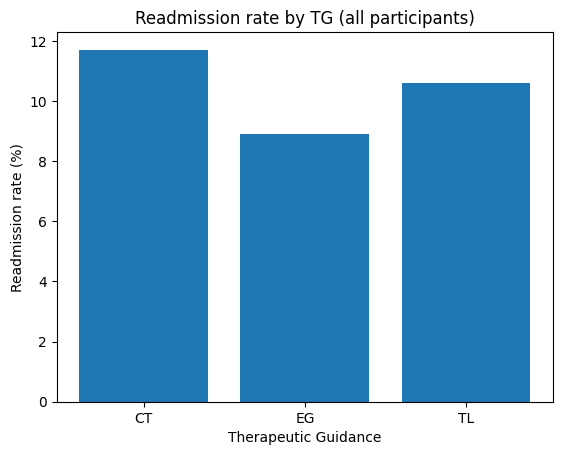

In [ ]:
total_patients_per_group = df1.groupby('Therapeutic Guidances').size()

readmission_rate = (df1.groupby('Therapeutic Guidances')['RAR'].sum() / total_patients_per_group) * 100

# Create a bar chart
plt.bar(readmission_rate.index, readmission_rate.values)
plt.xlabel("Therapeutic Guidance")
plt.ylabel("Readmission rate (%)")
plt.title("Readmission rate by TG (all participants)")

Text(0.5, 1.0, 'Mean length of stay by TG for Group G compared to length for Group S')

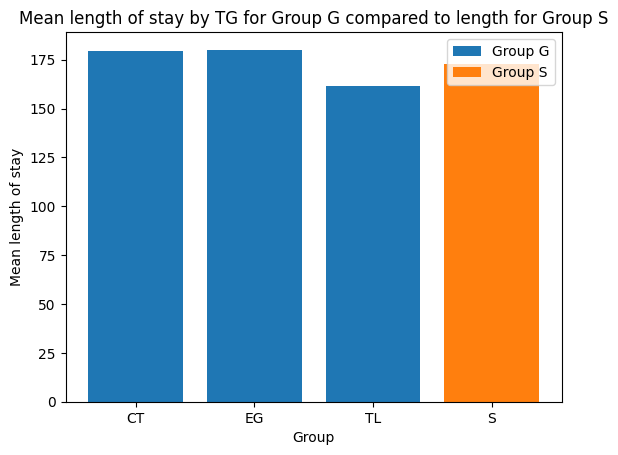

In [ ]:
los = (df_g.groupby('Therapeutic Guidances')['LOS'].mean())
los_s = (df_s.groupby('Assignment')['LOS'].mean())

# Create a bar chart
plt.bar(los.index, los.values, label='Group G')
plt.bar(los_s.index, los_s.values, label='Group S')
plt.xlabel("Group")
plt.ylabel("Mean length of stay")
plt.legend()
plt.title("Mean length of stay by TG for Group G compared to length for Group S")

Text(0.5, 1.0, 'Median length of stay by TG for Group G compared to length for Group S')

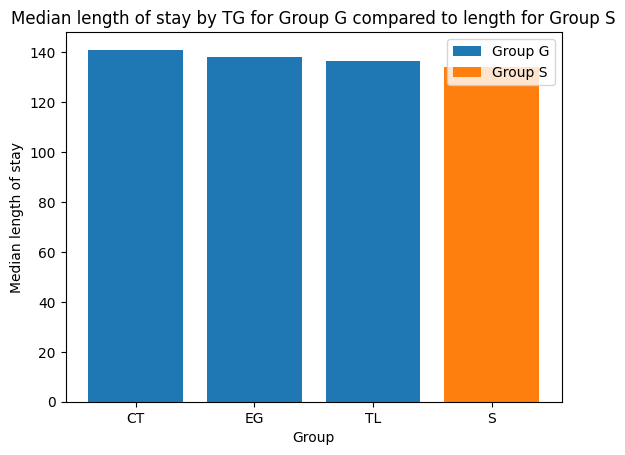

In [ ]:
los = (df_g.groupby('Therapeutic Guidances')['LOS'].median())
los_s = (df_s.groupby('Assignment')['LOS'].median())

# Create a bar chart
plt.bar(los.index, los.values, label='Group G')
plt.bar(los_s.index, los_s.values, label='Group S')
plt.xlabel("Group")
plt.ylabel("Median length of stay")
plt.legend()
plt.title("Median length of stay by TG for Group G compared to length for Group S")

Text(0, 0.5, '# of participants')

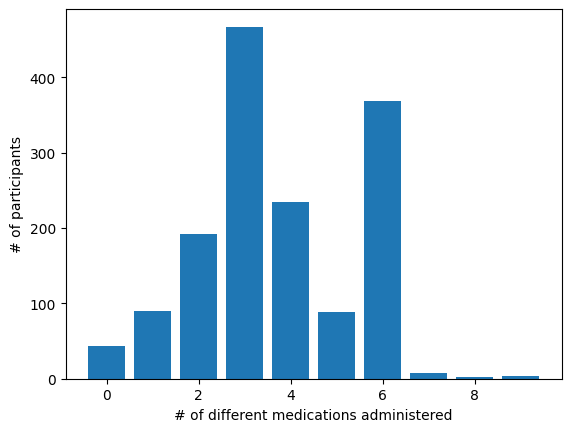

In [ ]:
meds = df['# Psychotropic Medications'].unique()
nums = df['# Psychotropic Medications'].value_counts()
plt.bar(meds, nums)
plt.xlabel("# of different medications administered")
plt.ylabel("# of participants")

Text(0, 0.5, '# of participants')

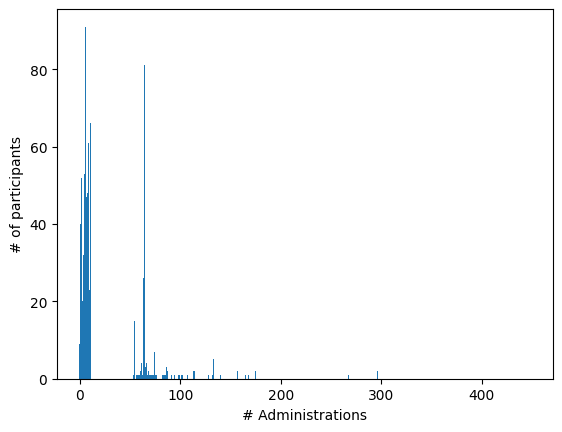

In [ ]:
admins = df['# Administrations'].unique()
nums = df['# Administrations'].value_counts()
plt.bar(admins, nums)
plt.xlabel("# Administrations")
plt.ylabel("# of participants")

Text(0, 0.5, '# of participants assigned the drug')

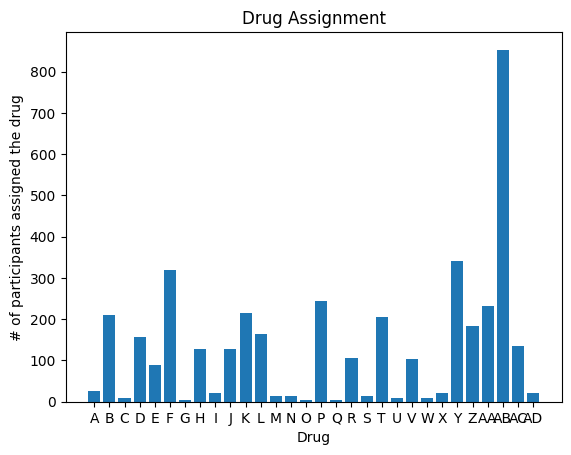

In [30]:
# Drug assignment
import matplotlib.pyplot as plt

drug_A_assigned = (df['A'] != 0).sum()
drug_B_assigned = (df['B'] != 0).sum()
drug_C_assigned = (df['C'] != 0).sum()
drug_D_assigned = (df['D'] != 0).sum()
drug_E_assigned = (df['E'] != 0).sum()
drug_F_assigned = (df['F'] != 0).sum()
drug_G_assigned = (df['G'] != 0).sum()
drug_H_assigned = (df['H'] != 0).sum()
drug_I_assigned = (df['I'] != 0).sum()
drug_J_assigned = (df['J'] != 0).sum()
drug_K_assigned = (df['K'] != 0).sum()
drug_L_assigned = (df['L'] != 0).sum()
drug_M_assigned = (df['M'] != 0).sum()
drug_N_assigned = (df['N'] != 0).sum()
drug_O_assigned = (df['O'] != 0).sum()
drug_P_assigned = (df['P'] != 0).sum()
drug_Q_assigned = (df['Q'] != 0).sum()
drug_R_assigned = (df['R'] != 0).sum()
drug_S_assigned = (df['S'] != 0).sum()
drug_T_assigned = (df['T'] != 0).sum()
drug_U_assigned = (df['U'] != 0).sum()
drug_V_assigned = (df['V'] != 0).sum()
drug_W_assigned = (df['W'] != 0).sum()
drug_X_assigned = (df['X'] != 0).sum()
drug_Y_assigned = (df['Y'] != 0).sum()
drug_Z_assigned = (df['Z'] != 0).sum()
drug_AA_assigned = (df['AA'] != 0).sum()
drug_AB_assigned = (df['AB'] != 0).sum()
drug_AC_assigned = (df['AC'] != 0).sum()
drug_AD_assigned = (df['AD'] != 0).sum()

data = {'A': drug_A_assigned, 'B': drug_B_assigned, 'C': drug_C_assigned, 'D': drug_D_assigned,
        'E': drug_E_assigned, 'F': drug_F_assigned, 'G': drug_G_assigned, 'H': drug_H_assigned,
        'I': drug_I_assigned, 'J': drug_J_assigned, 'K': drug_K_assigned, 'L': drug_L_assigned,
        'B': drug_B_assigned, 'M': drug_M_assigned, 'N': drug_N_assigned, 'O': drug_O_assigned,
        'P': drug_P_assigned, 'Q': drug_Q_assigned, 'R': drug_R_assigned, 'S': drug_S_assigned,
        'T': drug_T_assigned, 'U': drug_U_assigned, 'V': drug_V_assigned, 'W': drug_W_assigned,
        'X': drug_X_assigned, 'Y': drug_Y_assigned, 'Z': drug_Z_assigned, 'AA': drug_AA_assigned,
        'AB': drug_AB_assigned, 'AC': drug_AC_assigned, 'AD': drug_AD_assigned}

names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots()
axs.bar(names, values)

plt.title('Drug Assignment')
plt.xlabel("Drug")
plt.ylabel("# of participants assigned the drug")

Text(0.5, 1.0, 'Drug Assignment vs RAR')

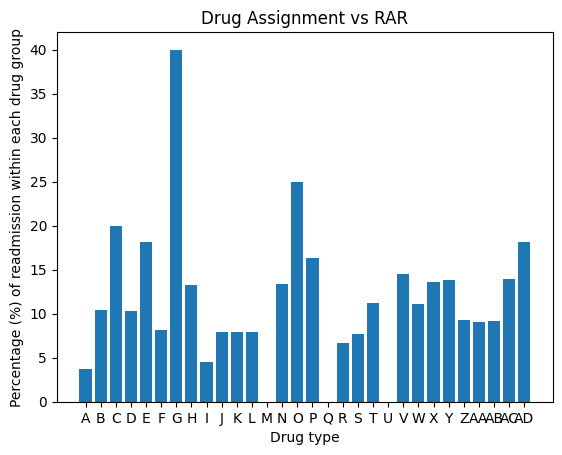

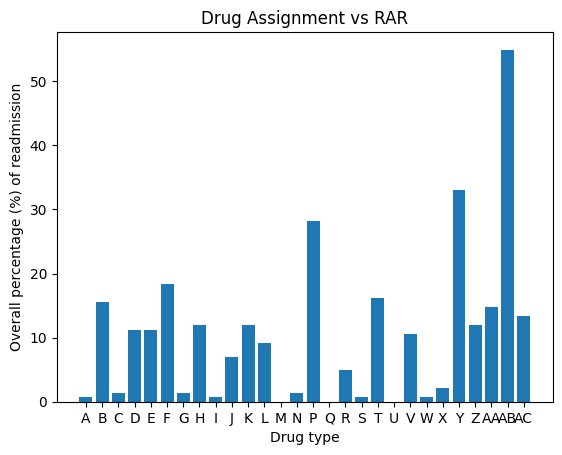

In [60]:
# Drug vs RAR (percentages)

# condition 1
rar = df['RAR'] == 1

# condition 2
drug_A_RAR = df['A'] != 0
drug_B_RAR = df['B'] != 0
drug_C_RAR = df['C'] != 0
drug_D_RAR = df['D'] != 0
drug_E_RAR = df['E'] != 0
drug_F_RAR = df['F'] != 0
drug_G_RAR = df['G'] != 0
drug_H_RAR = df['H'] != 0
drug_I_RAR = df['I'] != 0
drug_J_RAR = df['J'] != 0
drug_K_RAR = df['K'] != 0
drug_L_RAR = df['L'] != 0
drug_M_RAR = df['M'] != 0
drug_N_RAR = df['N'] != 0
drug_O_RAR = df['O'] != 0
drug_P_RAR = df['P'] != 0
drug_Q_RAR = df['Q'] != 0
drug_R_RAR = df['R'] != 0
drug_S_RAR = df['S'] != 0
drug_T_RAR = df['T'] != 0
drug_U_RAR = df['U'] != 0
drug_V_RAR = df['V'] != 0
drug_W_RAR = df['W'] != 0
drug_X_RAR = df['X'] != 0
drug_Y_RAR = df['Y'] != 0
drug_Z_RAR = df['Z'] != 0
drug_AA_RAR = df['AA'] != 0
drug_AB_RAR = df['AB'] != 0
drug_AC_RAR = df['AC'] != 0
drug_AD_RAR = df['AD'] != 0

# Combine conditions
combined_condition_A = rar & drug_A_RAR
combined_condition_B = rar & drug_B_RAR
combined_condition_C = rar & drug_C_RAR
combined_condition_D = rar & drug_D_RAR
combined_condition_E = rar & drug_E_RAR
combined_condition_F = rar & drug_F_RAR
combined_condition_G = rar & drug_G_RAR
combined_condition_H = rar & drug_H_RAR
combined_condition_I = rar & drug_I_RAR
combined_condition_J = rar & drug_J_RAR
combined_condition_K = rar & drug_K_RAR
combined_condition_L = rar & drug_L_RAR
combined_condition_M = rar & drug_M_RAR
combined_condition_N = rar & drug_N_RAR
combined_condition_O = rar & drug_O_RAR
combined_condition_P = rar & drug_P_RAR
combined_condition_Q = rar & drug_Q_RAR
combined_condition_R = rar & drug_R_RAR
combined_condition_S = rar & drug_S_RAR
combined_condition_T = rar & drug_T_RAR
combined_condition_U = rar & drug_U_RAR
combined_condition_V = rar & drug_V_RAR
combined_condition_W = rar & drug_W_RAR
combined_condition_X = rar & drug_X_RAR
combined_condition_Y = rar & drug_Y_RAR
combined_condition_Z = rar & drug_Z_RAR
combined_condition_AA = rar & drug_AA_RAR
combined_condition_AB = rar & drug_AB_RAR
combined_condition_AC = rar & drug_AC_RAR
combined_condition_AD = rar & drug_AD_RAR

# Count rows meeting both conditions
data = {'A': (df[combined_condition_A].shape[0]/drug_A_assigned) * 100, 'B': (df[combined_condition_B].shape[0]/drug_B_assigned) * 100, 'C': (df[combined_condition_C].shape[0]/drug_C_assigned) * 100, 'D': (df[combined_condition_D].shape[0]/drug_D_assigned) * 100,
        'E': (df[combined_condition_E].shape[0]/drug_E_assigned) * 100, 'F': (df[combined_condition_F].shape[0]/drug_F_assigned) * 100, 'G': (df[combined_condition_G].shape[0]/drug_G_assigned) * 100,
        'H': (df[combined_condition_H].shape[0]/drug_H_assigned) * 100, 'I': (df[combined_condition_I].shape[0]/drug_I_assigned) * 100, 'J': (df[combined_condition_J].shape[0]/drug_J_assigned) * 100, 'K': (df[combined_condition_K].shape[0]/drug_K_assigned) * 100,
        'L': (df[combined_condition_L].shape[0]/drug_L_assigned) * 100, 'M': (df[combined_condition_M].shape[0]/drug_M_assigned) * 100, 'N': (df[combined_condition_N].shape[0]/drug_N_assigned) * 100, 'O': (df[combined_condition_O].shape[0]/drug_O_assigned) * 100,
        'P': (df[combined_condition_P].shape[0]/drug_P_assigned) * 100, 'Q': (df[combined_condition_Q].shape[0]/drug_Q_assigned) * 100, 'R': (df[combined_condition_R].shape[0]/drug_R_assigned) * 100, 'S': (df[combined_condition_S].shape[0]/drug_S_assigned) * 100,
        'T': (df[combined_condition_T].shape[0]/drug_T_assigned) * 100, 'U': (df[combined_condition_U].shape[0]/drug_U_assigned) * 100, 'V': (df[combined_condition_V].shape[0]/drug_V_assigned) * 100, 'W': (df[combined_condition_W].shape[0]/drug_W_assigned) * 100,
        'X': (df[combined_condition_X].shape[0]/drug_X_assigned) * 100, 'Y': (df[combined_condition_Y].shape[0]/drug_Y_assigned) * 100, 'Z': (df[combined_condition_Z].shape[0]/drug_Z_assigned) * 100, 'AA': (df[combined_condition_AA].shape[0]/drug_AA_assigned) * 100,
        'AB': (df[combined_condition_AB].shape[0]/drug_AB_assigned) * 100, 'AC': (df[combined_condition_AC].shape[0]/drug_AC_assigned) * 100, 'AD': (df[combined_condition_AD].shape[0]/drug_AD_assigned) * 100}

names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots()
axs.bar(names, values)

plt.xlabel("Drug type")
plt.ylabel("Percentage (%) of readmission within each drug group")
plt.title('Drug Assignment vs RAR')

data = {'A': (df[combined_condition_A].shape[0]/num_rar) * 100, 'B': (df[combined_condition_B].shape[0]/num_rar) * 100, 'C': (df[combined_condition_C].shape[0]/num_rar) * 100, 'D': (df[combined_condition_D].shape[0]/num_rar) * 100,
        'E': (df[combined_condition_E].shape[0]/num_rar) * 100, 'F': (df[combined_condition_F].shape[0]/num_rar) * 100, 'G': (df[combined_condition_G].shape[0]/num_rar) * 100, 'H': (df[combined_condition_H].shape[0]/num_rar)* 100,
        'I': (df[combined_condition_I].shape[0]/num_rar) * 100, 'J': (df[combined_condition_J].shape[0]/num_rar) * 100, 'K': (df[combined_condition_K].shape[0]/num_rar) * 100,
        'L': (df[combined_condition_L].shape[0]/num_rar) * 100, 'M': (df[combined_condition_M].shape[0]/num_rar) * 100, 'N': (df[combined_condition_N].shape[0]/num_rar) * 100,
        'P': (df[combined_condition_P].shape[0]/num_rar) * 100, 'Q': (df[combined_condition_Q].shape[0]/num_rar) * 100, 'R': (df[combined_condition_R].shape[0]/num_rar) * 100,
        'S': (df[combined_condition_S].shape[0]/num_rar) * 100, 'T': (df[combined_condition_T].shape[0]/num_rar) * 100, 'U': (df[combined_condition_U].shape[0]/num_rar) * 100,
        'V': (df[combined_condition_V].shape[0]/num_rar) * 100, 'W': (df[combined_condition_W].shape[0]/num_rar) * 100, 'X': (df[combined_condition_X].shape[0]/num_rar) * 100,
        'Y': (df[combined_condition_Y].shape[0]/num_rar) * 100, 'Z': (df[combined_condition_Z].shape[0]/num_rar) * 100,
        'AA': (df[combined_condition_AA].shape[0]/num_rar) * 100, 'AB': (df[combined_condition_AB].shape[0]/num_rar) * 100, 'AC': (df[combined_condition_AC].shape[0]/num_rar) * 100}
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots()
axs.bar(names, values)

plt.xlabel("Drug type")
plt.ylabel("Overall percentage (%) of readmission")
plt.title('Drug Assignment vs RAR')



Text(0.5, 1.0, 'Drug Assignment vs Avg LOS')

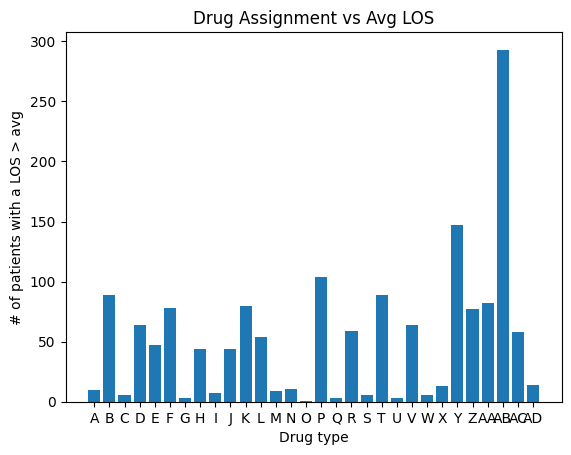

In [59]:
# Drug vs LOS

# condition 1
los = df['LOS'] > 177 # above the average los (in hours)

# condition 2
drug_A_RAR = df['A'] != 0
drug_B_RAR = df['B'] != 0
drug_C_RAR = df['C'] != 0
drug_D_RAR = df['D'] != 0
drug_E_RAR = df['E'] != 0
drug_F_RAR = df['F'] != 0
drug_G_RAR = df['G'] != 0
drug_H_RAR = df['H'] != 0
drug_I_RAR = df['I'] != 0
drug_J_RAR = df['J'] != 0
drug_K_RAR = df['K'] != 0
drug_L_RAR = df['L'] != 0
drug_M_RAR = df['M'] != 0
drug_N_RAR = df['N'] != 0
drug_O_RAR = df['O'] != 0
drug_P_RAR = df['P'] != 0
drug_Q_RAR = df['Q'] != 0
drug_R_RAR = df['R'] != 0
drug_S_RAR = df['S'] != 0
drug_T_RAR = df['T'] != 0
drug_U_RAR = df['U'] != 0
drug_V_RAR = df['V'] != 0
drug_W_RAR = df['W'] != 0
drug_X_RAR = df['X'] != 0
drug_Y_RAR = df['Y'] != 0
drug_Z_RAR = df['Z'] != 0
drug_AA_RAR = df['AA'] != 0
drug_AB_RAR = df['AB'] != 0
drug_AC_RAR = df['AC'] != 0
drug_AD_RAR = df['AD'] != 0

# Combine conditions
combined_condition_A = los & drug_A_RAR
combined_condition_B = los & drug_B_RAR
combined_condition_C = los & drug_C_RAR
combined_condition_D = los & drug_D_RAR
combined_condition_E = los & drug_E_RAR
combined_condition_F = los & drug_F_RAR
combined_condition_G = los & drug_G_RAR
combined_condition_H = los & drug_H_RAR
combined_condition_I = los & drug_I_RAR
combined_condition_J = los & drug_J_RAR
combined_condition_K = los & drug_K_RAR
combined_condition_L = los & drug_L_RAR
combined_condition_M = los & drug_M_RAR
combined_condition_N = los & drug_N_RAR
combined_condition_O = los & drug_O_RAR
combined_condition_P = los & drug_P_RAR
combined_condition_Q = los & drug_Q_RAR
combined_condition_R = los & drug_R_RAR
combined_condition_S = los & drug_S_RAR
combined_condition_T = los & drug_T_RAR
combined_condition_U = los & drug_U_RAR
combined_condition_V = los & drug_V_RAR
combined_condition_W = los & drug_W_RAR
combined_condition_X = los & drug_X_RAR
combined_condition_Y = los & drug_Y_RAR
combined_condition_Z = los & drug_Z_RAR
combined_condition_AA = los & drug_AA_RAR
combined_condition_AB = los & drug_AB_RAR
combined_condition_AC = los & drug_AC_RAR
combined_condition_AD = los & drug_AD_RAR

# Count rows meeting both conditions
data = {'A': df[combined_condition_A].shape[0], 'B': df[combined_condition_B].shape[0], 'C': df[combined_condition_C].shape[0], 'D': df[combined_condition_D].shape[0],
        'E': df[combined_condition_E].shape[0], 'F': df[combined_condition_F].shape[0], 'G': df[combined_condition_G].shape[0], 'H': df[combined_condition_H].shape[0],
        'I': df[combined_condition_I].shape[0], 'J': df[combined_condition_J].shape[0], 'K': df[combined_condition_K].shape[0], 'L': df[combined_condition_L].shape[0],
        'M': df[combined_condition_M].shape[0], 'N': df[combined_condition_N].shape[0], 'O': df[combined_condition_O].shape[0], 'P': df[combined_condition_P].shape[0],
        'Q': df[combined_condition_Q].shape[0], 'R': df[combined_condition_R].shape[0], 'S': df[combined_condition_S].shape[0], 'T': df[combined_condition_T].shape[0],
        'U': df[combined_condition_U].shape[0], 'V': df[combined_condition_V].shape[0], 'W': df[combined_condition_W].shape[0], 'X': df[combined_condition_X].shape[0],
        'Y': df[combined_condition_Y].shape[0], 'Z': df[combined_condition_Z].shape[0], 'AA': df[combined_condition_AA].shape[0], 'AB': df[combined_condition_AB].shape[0],
        'AC': df[combined_condition_AC].shape[0], 'AD': df[combined_condition_AD].shape[0]}

names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots()
axs.bar(names, values)

plt.xlabel("Drug type")
plt.ylabel("# of patients with a LOS > avg")
plt.title('Drug Assignment vs Avg LOS')

Text(0.5, 1.0, 'Group Assignment vs Avg LOS')

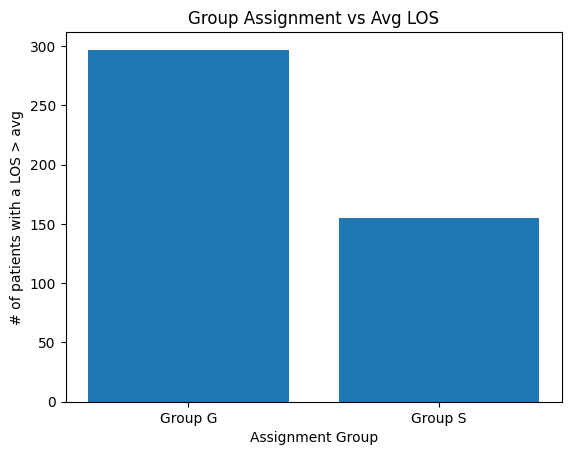

In [63]:
# LOS vs Group S/G assignment

# condition 1
los = df['LOS'] > 177 # above the average los (in hours)

# condition 2
group_G = df['Assignment'] == 'G'
group_S = df['Assignment'] == 'S'

# Combine conditions
combined_condition_G = los & group_G
combined_condition_S = los & group_S

# Count rows meeting both conditions
data = {'Group G': df[combined_condition_G].shape[0], 'Group S': df[combined_condition_S].shape[0]}

names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots()
axs.bar(names, values)

plt.xlabel("Assignment Group")
plt.ylabel("# of patients with a LOS > avg")
plt.title('Group Assignment vs Avg LOS')
